In [109]:
import time
 
start_time = time.time()
sum = 0
for i in range(100000000):
    sum += i
print(sum)

4999999950000000


In [110]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os
#Custom tool functions

## 1. Load the data

In [111]:
import os
import pandas as pd

file_path='./testdata'
filenames = os.listdir(file_path)
#Go through the folder and merge the data
csv_path=[]
for file in filenames:
    for data_csv in os.listdir(file_path+'/'+file):
        tem_path=file_path+'/'+file+'/'+data_csv
        csv_path.append(tem_path)

#Begin to merge
temp=[]
for csv in csv_path:
    print(f'{csv} File merging in progress......')
    data=pd.read_csv(csv)
    # Add drivers i.e.volunteers and routes
    data['Driver']=str(csv.split('/')[2])
    if int(csv.split('_')[1].split('.')[0])==3:
        data['Road']=0
    elif int(csv.split('_')[1].split('.')[0])==4:
        data['Road']=1
    else:
        data['Road']=2
    #data['Road']=str(csv.split('_')[1].split('.')[0])
    temp.append(data)
df = pd.concat(temp)
writer=pd.ExcelWriter(r"result.xlsx")
df.to_excel(writer,sheet_name='Data1',index=False)
writer.save()
writer.close()
print('Complete the merger...........................')

./testdata/1/1_3.csv File merging in progress......
./testdata/1/1_4.csv File merging in progress......
./testdata/1/1_7.csv File merging in progress......
./testdata/10/10_3.csv File merging in progress......
./testdata/10/10_4.csv File merging in progress......
./testdata/10/10_7.csv File merging in progress......
./testdata/11/11_3.csv File merging in progress......
./testdata/11/11_4.csv File merging in progress......
./testdata/11/11_7.csv File merging in progress......
./testdata/12/12_3.csv File merging in progress......
./testdata/12/12_4.csv File merging in progress......
./testdata/12/12_7.csv File merging in progress......
./testdata/13/13_3.csv File merging in progress......
./testdata/13/13_4.csv File merging in progress......
./testdata/13/13_7.csv File merging in progress......
./testdata/14/14_3.csv File merging in progress......
./testdata/14/14_4.csv File merging in progress......
./testdata/14/14_7.csv File merging in progress......
./testdata/15/15_3.csv File mergin

## 2. Data preprocessing

In [112]:
data=pd.read_excel('./result.xlsx')

In [113]:
data.tail(11)

,Time,Position,Orientation,Velocity,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Preceding_Vel,Driver,Road
169864,477.2,(8066.182 -0.014 8139.672),(0.719 0.001 0.695),(21.938 0.000 21.228),(-115.469 0.000 -111.410),3949.291,5.0,0.475,0.0,-0.014,(17.028 -0.004 16.181),9,2
169865,477.4,(8070.567 -0.014 8143.921),(0.718 0.001 0.696),(21.915 0.000 21.261),(-114.526 -0.001 -110.433),3950.346,5.0,0.462,0.0,-0.014,(17.310 0.001 16.447),9,2
169866,477.6,(8074.946 -0.014 8148.176),(0.717 0.001 0.697),(21.883 0.000 21.284),(-113.542 -0.006 -109.406),3949.675,5.0,0.416,0.0,-0.014,(16.821 0.001 15.982),9,2
169867,477.8,(8079.319 -0.014 8152.434),(0.716 0.001 0.698),(21.840 0.000 21.298),(-112.490 -0.006 -108.301),3947.075,5.0,0.415,0.0,-0.014,(16.138 0.001 15.334),9,2
169868,478.0,(8083.683 -0.014 8156.695),(0.715 0.001 0.699),(21.809 0.000 21.311),(-111.193 -0.011 -106.954),3945.114,5.0,0.443,0.0,-0.010,(14.662 0.002 13.932),9,2
169869,478.2,(8088.043 -0.014 8160.958),(0.715 0.001 0.699),(21.796 0.000 21.318),(-109.669 -0.005 -105.386),3944.451,5.0,0.457,0.0,-0.006,(13.835 0.001 13.145),9,2
169870,478.4,(8092.404 -0.014 8165.220),(0.715 0.001 0.699),(21.805 0.000 21.314),(-107.927 -0.010 -103.613),3944.798,5.0,0.476,0.0,0.002,(12.470 0.001 11.848),9,2
169871,478.6,(8096.767 -0.014 8169.483),(0.715 0.001 0.699),(21.829 0.000 21.318),(-105.920 -0.008 -101.588),3947.058,5.0,0.533,0.0,0.008,(11.359 0.002 10.792),9,2
169872,478.8,(8101.138 -0.014 8173.749),(0.716 0.002 0.698),(21.880 0.000 21.340),(-103.848 0.000 -99.507),3953.219,5.0,0.608,0.0,0.014,(11.640 -0.001 11.060),9,2
169873,479.0,(8105.523 -0.014 8178.020),(0.717 0.002 0.697),(21.972 0.000 21.365),(-101.733 -0.009 -97.393),3963.605,5.0,0.660,0.0,0.019,(10.923 0.001 10.378),9,2


In [114]:
#Remove the direction
data=data.drop(' Orientation',axis=1)

In [115]:
## Remove rows with null values
data=data.dropna(axis=0, how='any', inplace=False)
data=data.reset_index(drop=True)
data.head()

,Time,Position,Velocity,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Preceding_Vel,Driver,Road
0,2.0,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.980 -0.049 -0.485),0.0,0.0,0.0,0.0,0.006,(0.000 0.000 0.000),1,0
1,2.2,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.957 -0.106 -0.513),0.0,0.0,0.0,0.0,0.006,(-0.196 -0.880 -0.060),1,0
2,2.4,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.902 0.052 -0.498),0.0,0.0,0.0,0.0,0.006,(-0.191 0.005 0.096),1,0
3,2.6,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.878 -0.015 -0.489),0.0,0.0,0.0,0.0,0.006,(-0.151 0.121 -0.022),1,0
4,2.8,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.848 0.003 -0.486),0.0,0.0,0.0,0.0,0.006,(-0.140 -0.076 -0.018),1,0


In [116]:
#Split the positions, including x and y
px=[]
py=[]
dis=[]
for i in range(len(data)):
    m=float(data.iloc[i,1].split('(')[1].split(' ')[0])
    n=float(data.iloc[i,1].split(' ')[2].split(')')[0])
    #Calculate the distance between two cars - volunteer's car and the proceding car
    headway_dis=((m-float(data.iloc[i,3].split('(')[1].split(' ')[0]))**2+(n-float(data.iloc[i,3].split(' ')[2].split(')')[0]))**2)**0.5
    px.append(m)
    py.append(n)
    dis.append(headway_dis)
data['Position_X'] = px
data['Position_Y'] = py
data[' Headway_Distance'] = dis
data=data.drop(' Position',axis=1)
data.head(10)

,Time,Velocity,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Preceding_Vel,Driver,Road,Position_X,Position_Y
0,2.0,(0.000 0.000 0.000),1222.438379,0.0,0.0,0.0,0.0,0.006,(0.000 0.000 0.000),1,0,1190.092,252.037
1,2.2,(0.000 0.000 0.000),1222.421659,0.0,0.0,0.0,0.0,0.006,(-0.196 -0.880 -0.060),1,0,1190.092,252.037
2,2.4,(0.000 0.000 0.000),1222.364747,0.0,0.0,0.0,0.0,0.006,(-0.191 0.005 0.096),1,0,1190.092,252.037
3,2.6,(0.000 0.000 0.000),1222.339405,0.0,0.0,0.0,0.0,0.006,(-0.151 0.121 -0.022),1,0,1190.092,252.037
4,2.8,(0.000 0.000 0.000),1222.309433,0.0,0.0,0.0,0.0,0.006,(-0.140 -0.076 -0.018),1,0,1190.092,252.037
5,3.0,(0.000 0.000 0.000),1222.282395,0.0,0.0,0.0,0.0,0.006,(-0.127 0.033 -0.019),1,0,1190.092,252.037
6,3.2,(0.000 0.000 0.000),1222.355060,0.0,0.0,0.0,0.0,0.006,(0.723 -0.013 0.084),1,0,1190.092,252.037
7,3.4,(0.000 0.000 0.000),1222.540408,0.0,0.0,0.0,0.0,0.006,(1.094 0.003 0.157),1,0,1190.092,252.037
8,3.6,(0.000 0.000 0.000),1222.792800,0.0,0.0,0.0,0.0,0.006,(1.406 0.002 0.087),1,0,1190.092,252.037
9,3.8,(0.000 0.000 0.000),1223.103443,0.0,0.0,0.0,0.0,0.006,(1.697 -0.006 -0.006),1,0,1190.092,252.037


In [117]:
#Get the speed of the current vehicle and the preceding vehicle
vel=[]
pre_vel=[]
for i in range(len(data)):
    x_vel=float(data.iloc[i,1].split('(')[1].split(' ')[0])
    y_vel=float(data.iloc[i,1].split(' ')[2].split(')')[0])
    vel.append((round((x_vel**2+y_vel**2)**0.5,4)))
    
    xpre_vel=float(data.iloc[i,8].split('(')[1].split(' ')[0])
    ypre_vel=float(data.iloc[i,8].split(' ')[2].split(')')[0])
    pre_vel.append((round((xpre_vel**2+ypre_vel**2)**0.5,4)))
data['Velocity'] = vel
data['Pre_Velocity'] = pre_vel
data=data.drop(' Preceding_Vel',axis=1)
data=data.drop(' Velocity',axis=1)
data.head()

,Time,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Driver,Road,Position_X,Position_Y,Velocity,Pre_Velocity
0,2.0,1222.438379,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.0000
1,2.2,1222.421659,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.2050
2,2.4,1222.364747,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.2138
3,2.6,1222.339405,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.1526
4,2.8,1222.309433,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.1412


In [118]:
#Save the data
data=data.drop('Time',axis=1)

data_Driver = data.Driver
data = data.drop('Driver',axis=1)
data['Driver']=data_Driver

data_Road = data.Road
data = data.drop('Road',axis=1)
data['Road']=data_Road
data.to_csv('process_data.csv')
data.head()

,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Position_X,Position_Y,Velocity,Pre_Velocity,Driver,Road
0,1222.438379,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.0000,1,0
1,1222.421659,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.2050,1,0
2,1222.364747,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.2138,1,0
3,1222.339405,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.1526,1,0
4,1222.309433,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.1412,1,0


## 3. Cluster Labeling and PCA analysis

### 3.1 K-means Clustering

In [119]:
import numpy as np
from sklearn.cluster import KMeans

In [120]:
#Convert the data to array format and send it to kmeans
copy_data=data
save_data=data
data=data.iloc[:,:10]
data=np.array(data)
n_clusters=3
# kmeans classification
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(data)
#Means of clusters
centroid=cluster.cluster_centers_
centroid

array([[ 8.99438238e+03,  3.50123130e+03,  3.67147034e+00,
         5.38760443e-01,  3.87144110e-02, -3.27034252e-03,
         7.37109490e+03,  4.30422133e+03,  2.00434669e+01,
         1.97213092e+01],
       [ 2.50868867e+03,  3.46120347e+03,  3.30430965e+00,
         5.10031022e-01,  2.45061976e-02, -1.68457849e-03,
         2.00405599e+03,  8.43061932e+02,  1.83942637e+01,
         2.01212456e+01],
       [ 5.83328194e+03,  3.69668784e+03,  3.57345758e+00,
         5.48169227e-01,  3.86901288e-02, -2.66251270e-03,
         4.98840878e+03,  2.09834994e+03,  1.98415174e+01,
         1.95979033e+01]])

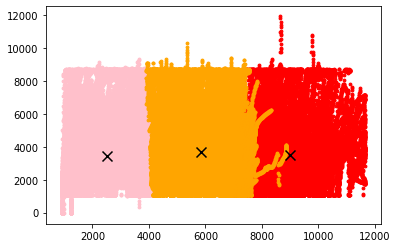

In [121]:
#Get the label of each sample of the trained object
import matplotlib.pyplot as plt
y_pred = cluster.labels_
#pd.DataFrame(y_pred).to_csv('labels.csv')
color=['red','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(n_clusters):
    axi1.scatter(data[y_pred==i, 0], data[y_pred==i, 1],
               marker='o',
               s=8,
               c=color[i])
axi1.scatter(centroid[:,0],centroid[:,1],marker='x',s=100,c='black')
plt.savefig('k_means_labels.jpg',dpi=300)
#modify

In [122]:
##Save the whole data and write to the k-means tag
y_preddf = pd.DataFrame(y_pred)
save_data['K-means_label']=y_preddf
save_data.to_csv('kmeans_data.csv')
save_data

,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Position_X,Position_Y,Velocity,Pre_Velocity,Driver,Road,K-means_label
0,1222.438379,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.0000,1,0,1
1,1222.421659,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.2050,1,0,1
2,1222.364747,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.2138,1,0,1
3,1222.339405,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.1526,1,0,1
4,1222.309433,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.1412,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169120,11645.558282,3944.798,5.0,0.476,0.0,0.002,8092.404,8165.220,30.4917,17.2010,9,2,0
169121,11648.806355,3947.058,5.0,0.533,0.0,0.008,8096.767,8169.483,30.5117,15.6683,9,2,0
169122,11651.976661,3953.219,5.0,0.608,0.0,0.014,8101.138,8173.749,30.5635,16.0566,9,2,0
169123,11655.106665,3963.605,5.0,0.660,0.0,0.019,8105.523,8178.020,30.6469,15.0670,9,2,0


### 3.1 PCA

x shape:(169125, 10)    x_transform shape:(169125, 10)


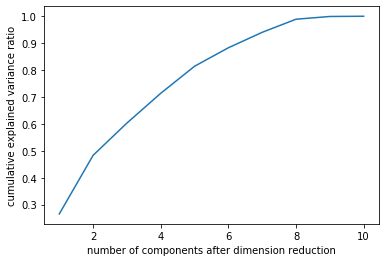

In [123]:
from sklearn.decomposition import PCA
### Data standardisation 
from sklearn import preprocessing
X=preprocessing.scale(copy_data.iloc[:,:10])
pca = PCA() # Initialization
pca = pca.fit(X) 
X_reduced = pca.transform(X) # Get new matrix
print('x shape:'+ str(X.shape) +'    x_transform shape:'+ str(X_reduced.shape)) 

# Number of features for optimal dimension reduction in PCA
plt.plot(np.arange(1,11,1),np.cumsum(pca.explained_variance_ratio_))
plt.xticks() # [1,2,3,4]
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.savefig('best_feture.jpg',dpi=300)
plt.show()

x shape:(169125, 10)    x_transform shape:(169125, 3)


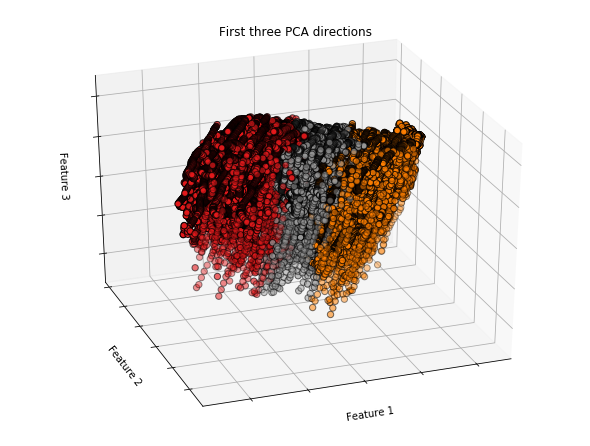

array([0.26530854, 0.21783645, 0.11990393])

In [124]:
from mpl_toolkits.mplot3d import Axes3D
X=preprocessing.scale(copy_data.iloc[:,:10])
n=3 # 3 principal components
pca = PCA(n_components=n) 
pca = pca.fit(X) 
X_reduced = pca.transform(X) # Obtain dimensionality reduction data
print('x shape:'+ str(X.shape) +'    x_transform shape:'+ str(X_reduced.shape)) 

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("Feature 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Feature 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Feature 3")
ax.w_zaxis.set_ticklabels([])
plt.savefig('3D.jpg',dpi=300)
plt.show()
pca.explained_variance_ratio_

#### Show variance_rational and variance of PCA

In [125]:
from mpl_toolkits.mplot3d import Axes3D
X=preprocessing.scale(copy_data.iloc[:,:10])
n=3 # 3 principal components ## n can be modified
pca = PCA(n_components=n) 
pca = pca.fit(X) 
print('The proportion of variance of features retained after dimension reduction in principal components is: '+str(pca.explained_variance_ratio_))
print('The variance (eigenvalue) of the retained feature after dimension reduction by PCA is: '+str(pca.explained_variance_))

The proportion of variance of features retained after dimension reduction in principal components is: [0.26530854 0.21783645 0.11990393]
The variance (eigenvalue) of the retained feature after dimension reduction by PCA is: [2.65310111 2.17837734 1.1990464 ]


## 4. Build data set 

In [126]:
# Maybe put before K means
def normalization(X_train, X_val, X_test, type = 'min-max'):
    if type == 'min-max':
        for i in range(len(X_train[0,0])):
            train_min, train_max = X_train[:,0,i].min(),X_train[:,0,i].max() 
            X_train[:,0,i] = (X_train[:,0,i] - train_min)/(train_max - train_min)
            X_val[:,0,i] = (X_val[:,0,i] - train_min)/(train_max - train_min)
            X_test[:,0,i] = (X_test[:,0,i] - train_min)/(train_max - train_min)
    elif type == 'standardization':
        for i in range(len(X_train[0,0])):
            train_mean, train_std = X_train[:,0,i].mean(),X_train[:,0,i].std() 
            X_train[:,0,i] = (X_train[:,0,i] - train_mean)/train_std
            X_val[:,0,i] = (X_val[:,0,i] - train_mean)/train_std
            X_test[:,0,i] = (X_test[:,0,i] - train_mean)/train_std
    return X_train, X_val, X_test

In [127]:
shape=20
train_per=0.7
val_per=0.2
test_per=0.1

datas=data
data_list=[]
Labels=[]
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
X_val=[]
Y_val=[]
ans=[]

divisions = int(len(datas)/shape)
datas = datas[:divisions * shape]
for i in range(divisions):
    data_list.append(datas[shape * (i):shape * (i+1)])       #features
    Labels.append(y_pred[shape * (i):shape * (i+1)])         # label
    driver=copy_data.iloc[i*shape,10]
    road=copy_data.iloc[i*shape,11]
    ans.append([driver,road])  
ans = np.asarray(ans)

value = (np.sum(Labels, axis=1)/shape).astype(int)
train_split_index = int(train_per * len(data_list))
val_split_index = int(val_per * len(data_list)) + train_split_index

# Return - the training set, validation set and test set
X_train.extend(data_list[: train_split_index])
X_train = np.asarray(X_train)
X_val.extend(data_list[train_split_index:val_split_index])
X_val = np.asarray(X_val)
X_test.extend(data_list[val_split_index:])
X_test = np.asarray(X_test)

Y_train=value[: train_split_index]
Y_val=value[train_split_index:val_split_index]
Y_test=value[val_split_index:]
Y_train = np.hstack((ans[: train_split_index], Y_train[:,np.newaxis])) #The cell can only be run once, and an error will be reported if it is run a second time
Y_val = np.hstack((ans[train_split_index:val_split_index], Y_val[:,np.newaxis]))  #The cell can only be run once, and an error will be reported if it is run a second time
Y_test = np.hstack((ans[val_split_index:], Y_test[:,np.newaxis]))  #The cell can only be run once, and an error will be reported if it is run a second time
#Normalization
X_train, X_val, X_test = normalization(X_train, X_val, X_test, type = 'min-max') # min-max
#Disorder
all_data = np.append(X_train,X_val,axis=0)
all_data= np.append(all_data,X_test,axis=0)
all_label=np.append(Y_train,Y_val,axis=0)
all_label=np.append(all_label,Y_test,axis=0)
indices = np.arange(all_data.shape[0])
np.random.shuffle(indices)
all_data = all_data[indices]
all_label = all_label[indices]
#The disrupted data is divided into a training set, a validation set and a test set
X_train=all_data[: train_split_index]
X_val=all_data[train_split_index:val_split_index]
X_test=all_data[val_split_index:]
Y_train=all_label[: train_split_index]
Y_val=all_label[train_split_index:val_split_index]
Y_test=all_label[val_split_index:]

print('X_train:'+str(X_train.shape)+'   Y_train:'+str(Y_train.shape)  )
print('X_val:'+str(X_val.shape)+ '  Y_val:'+str(Y_val.shape))
print('X_test:'+str(X_test.shape)+ '  Y_test:'+str(Y_test.shape))

X_train:(5919, 20, 10)   Y_train:(5919, 3)
X_val:(1691, 20, 10)  Y_val:(1691, 3)
X_test:(846, 20, 10)  Y_test:(846, 3)


## 5. Model training and parameter setting

In [128]:
def my_model_cnn(ishape = (1,7), k = 3, lr = 1e-4, drop_out = 0.1, weight_decay = 1e-4):
    model_input = tf.keras.layers.Input(shape = ishape)
    l1 = tf.keras.layers.Conv1D(32, 2, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(model_input)
    l1_batch = tf.keras.layers.BatchNormalization()(l1)
    l2 = tf.keras.layers.Conv1D(32, 2, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l1_batch)
    l2_batch = tf.keras.layers.BatchNormalization()(l2)
    l2_drop = tf.keras.layers.Dropout(drop_out)(l2_batch)
    l3 = tf.keras.layers.MaxPool1D(padding='same')(l2_drop)

    l4 = tf.keras.layers.Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l3)
    l4_batch = tf.keras.layers.BatchNormalization()(l4)
    l5 = tf.keras.layers.Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l4_batch)
    l5_batch = tf.keras.layers.BatchNormalization()(l5)
    l5_drop = tf.keras.layers.Dropout(2*drop_out)(l5_batch)
    l6 = tf.keras.layers.MaxPool1D(padding='same')(l5_drop)

    l7 = tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l6)
    l7_batch = tf.keras.layers.BatchNormalization()(l7)
    l8 = tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l7_batch)
    l8_batch = tf.keras.layers.BatchNormalization()(l8)
    l8_drop = tf.keras.layers.Dropout(3*drop_out)(l8_batch)
    l9 = tf.keras.layers.MaxPool1D(padding='same')(l8_drop)

    flat = tf.keras.layers.Flatten()(l9)
    out = tf.keras.layers.Dense(k, activation = 'softmax')(flat)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    opt_rms = tf.keras.optimizers.RMSprop(lr=lr,decay=1e-6)
    model.compile(optimizer=opt_rms, loss='categorical_crossentropy', metrics = ["accuracy", f1])
    
    return model

def callbacks(name):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience =150)

    monitor = tf.keras.callbacks.ModelCheckpoint(name, monitor='val_loss',\
                                                verbose=0,save_best_only=True,\
                                                save_weights_only=True,\
                                                mode='min')
    # Learning rate schedule
    def scheduler(epoch, lr):
        if epoch%60 == 0:
            lr = lr/2
        return lr

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)
    
    return early_stop, monitor, lr_schedule

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))

In [130]:
# Save the training model name
model_name_cnn_batched = "team_4_CNN_batched.h5"
# Instantiating the model
import tensorflow as tf
model_CNN_batched = my_model_cnn(ishape=(len(X_train[0]), len(X_train[0,0])))
# Early stop setting
early_stop, monitor, lr_schedule = callbacks(model_name_cnn_batched)
# Print parameters
print(model_CNN_batched.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 20, 10)]          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 20, 32)            672       
_________________________________________________________________
batch_normalization_18 (Batc (None, 20, 32)            128       
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 20, 32)            2080      
_________________________________________________________________
batch_normalization_19 (Batc (None, 20, 32)            128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20, 32)            0         
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 10, 32)            0   

In [131]:
# Start training
history_CNN_batched = model_CNN_batched.fit(    
    X_train, 
    Y_train, 
    batch_size = 32, 
    epochs = 1000, 
    verbose = 1, 
    callbacks=[early_stop, monitor, lr_schedule], 
    validation_data = (X_val, Y_val)
)

Train on 5919 samples, validate on 1691 samples
Epoch 1/1000
5919/5919 [==============================] - 4s 739us/sample - loss: 16.9320 - accuracy: 0.8481 - f1: 0.6547 - val_loss: 13.4686 - val_accuracy: 0.9740 - val_f1: 0.5935
Epoch 2/1000
5919/5919 [==============================] - 2s 263us/sample - loss: 31.8540 - accuracy: 0.9742 - f1: 0.5928 - val_loss: 44.4351 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 3/1000
5919/5919 [==============================] - 2s 262us/sample - loss: 39.4596 - accuracy: 0.9748 - f1: 0.5925 - val_loss: 51.7188 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 4/1000
5919/5919 [==============================] - 2s 297us/sample - loss: 42.9543 - accuracy: 0.9747 - f1: 0.5928 - val_loss: 52.5694 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 5/1000
5919/5919 [==============================] - 2s 321us/sample - loss: 45.1187 - accuracy: 0.9750 - f1: 0.5926 - val_loss: 52.4794 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 6/1000
5919/5919 [==================

5919/5919 [==============================] - 2s 285us/sample - loss: 72.9713 - accuracy: 0.9750 - f1: 0.5925 - val_loss: 74.6133 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 46/1000
5919/5919 [==============================] - 2s 280us/sample - loss: 73.4921 - accuracy: 0.9750 - f1: 0.5926 - val_loss: 75.3955 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 47/1000
5919/5919 [==============================] - 2s 268us/sample - loss: 74.0040 - accuracy: 0.9750 - f1: 0.5926 - val_loss: 74.2732 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 48/1000
5919/5919 [==============================] - 2s 266us/sample - loss: 74.4054 - accuracy: 0.9750 - f1: 0.5927 - val_loss: 76.3935 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 49/1000
5919/5919 [==============================] - 2s 263us/sample - loss: 75.0522 - accuracy: 0.9750 - f1: 0.5927 - val_loss: 75.9821 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 50/1000
5919/5919 [==============================] - 2s 272us/sample - loss: 75.6543 - accura

5919/5919 [==============================] - 2s 264us/sample - loss: 91.4655 - accuracy: 0.9750 - f1: 0.5925 - val_loss: 92.6214 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 90/1000
5919/5919 [==============================] - 2s 264us/sample - loss: 91.5895 - accuracy: 0.9750 - f1: 0.5925 - val_loss: 91.7552 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 91/1000
5919/5919 [==============================] - 2s 261us/sample - loss: 91.7782 - accuracy: 0.9750 - f1: 0.5925 - val_loss: 93.4359 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 92/1000
5919/5919 [==============================] - 2s 265us/sample - loss: 92.1507 - accuracy: 0.9750 - f1: 0.5928 - val_loss: 93.2600 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 93/1000
5919/5919 [==============================] - 2s 264us/sample - loss: 92.6435 - accuracy: 0.9750 - f1: 0.5927 - val_loss: 93.5382 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 94/1000
5919/5919 [==============================] - 2s 258us/sample - loss: 92.8062 - accura

5919/5919 [==============================] - 2s 261us/sample - loss: 103.3728 - accuracy: 0.9750 - f1: 0.5927 - val_loss: 103.7995 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 134/1000
5919/5919 [==============================] - 2s 269us/sample - loss: 103.6575 - accuracy: 0.9750 - f1: 0.5927 - val_loss: 104.5434 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 135/1000
5919/5919 [==============================] - 2s 272us/sample - loss: 103.6653 - accuracy: 0.9750 - f1: 0.5926 - val_loss: 103.5284 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 136/1000
5919/5919 [==============================] - 2s 268us/sample - loss: 103.8560 - accuracy: 0.9750 - f1: 0.5926 - val_loss: 104.6083 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 137/1000
5919/5919 [==============================] - 2s 276us/sample - loss: 103.8729 - accuracy: 0.9750 - f1: 0.5926 - val_loss: 108.4710 - val_accuracy: 0.9763 - val_f1: 0.5908
Epoch 138/1000
5919/5919 [==============================] - 2s 277us/sample - loss: 1

Final loss (cross-entropy and accuracy and F1): [13.402060630473684, 0.96926713, 0.5948815]


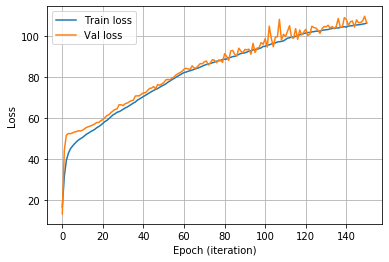

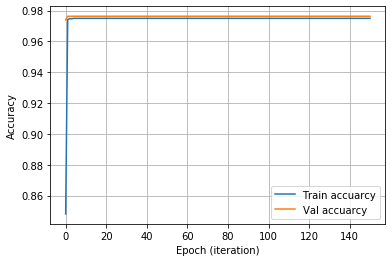

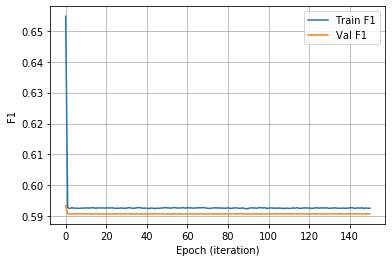

In [132]:
### Plotting the results of the training process
model_CNN_batched.load_weights(model_name_cnn_batched)
loss_cnn_batched = model_CNN_batched.evaluate(X_test, Y_test, verbose=0)
print('Final loss (cross-entropy and accuracy and F1):',loss_cnn_batched)

plt.plot(history_CNN_batched.history['loss'], label = "Train loss")
plt.plot(history_CNN_batched.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig('Loss.jpg',dpi=300)
plt.show()


plt.plot(history_CNN_batched.history['accuracy'], label = "Train accuarcy")
plt.plot(history_CNN_batched.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.savefig('Accuracy.jpg',dpi=300)
plt.show()

plt.plot(history_CNN_batched.history['f1'], label = "Train F1")
plt.plot(history_CNN_batched.history['val_f1'], label = "Val F1")
plt.xlabel("Epoch (iteration)")
plt.ylabel("F1")
plt.legend()
plt.grid()
plt.savefig('F1-score.jpg',dpi=300)
plt.show()

In [133]:

 
end_time = time.time()
print("Execution time: {:.2f}s".format(end_time - start_time))
 

Execution time: 376.49seconds
